<a href="https://colab.research.google.com/github/ruhulamin63/-Childrens-Basic-Learning-Project-Assembly-Language/blob/main/Analyzing_For_Students_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title: Analyzing For Student Assessment.**

**Objective: ** This data set consists of the assessment secured by the students in various subjects.

**Summary**

The dataset includes student performance scores in three subjects: math, reading, and writing, along with various demographic and educational features such as gender, race/ethnicity, parental level of education, lunch type, and test preparation course.

Inferences would be :
1. How to imporve the students performance in each test ?
2. What are the major factors influencing the test scores ?
3. Effectiveness of test preparation course?

**Index of Content**

1.0 Uploading the Dataset

2.0 Importing the modules

3.0 Before analyzing the data
*   3.1 It's essential to clean it.
*   3.2 We'll check for any missing values and data types.

4.0 Exploratory Data Analysis (EDA)
*   4.1 Descriptive Statistics
*   4.2 Distribution of Scores

5.0 Analyzing Categorical Variables
*   5.1 Gender Analysis

6.0 Parental Level of Education

7.0 Correlation Analysis

8.0 Data Preprocessing for Machine Learning

9.0 Support Vector Machine (SVM)

10.0  Decision Tree

11.0 conclusion

**Group members:**
*   Ruhul Amin: **M230205043**
*   Shawon Banik: **M230205002**

**Dataset source:** https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


**1.0 Uploading the Dataset** **bold text**

In [62]:
from google.colab import files
uploaded = files.upload()

**2.0 Importing the modules**

In [63]:
import pandas as pd

# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')
dataset[:2]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


**3.0 Before analyzing the data, it's essential to clean it. We'll check for any missing values and data types.**


In [64]:
# Check for missing values
print(df.isnull().sum())

# Display data types
print(df.dtypes)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


**4.0 Exploratory Data Analysis (EDA)**
*   4.1 Descriptive Statistics

In [65]:
# Summary statistics
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


**4.2 Distribution of Scores**

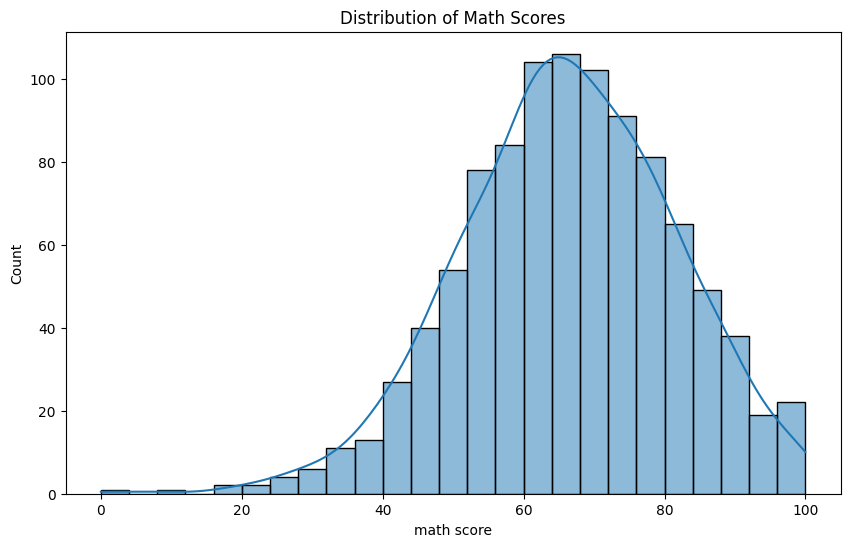

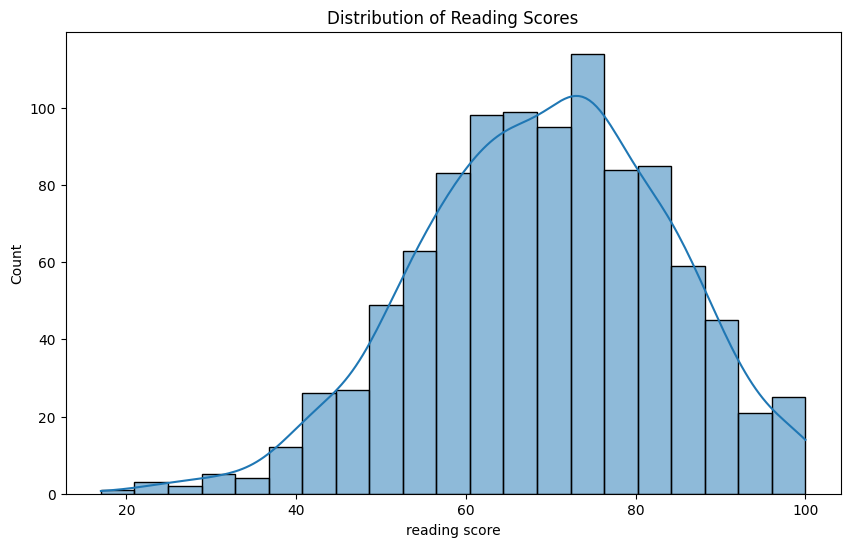

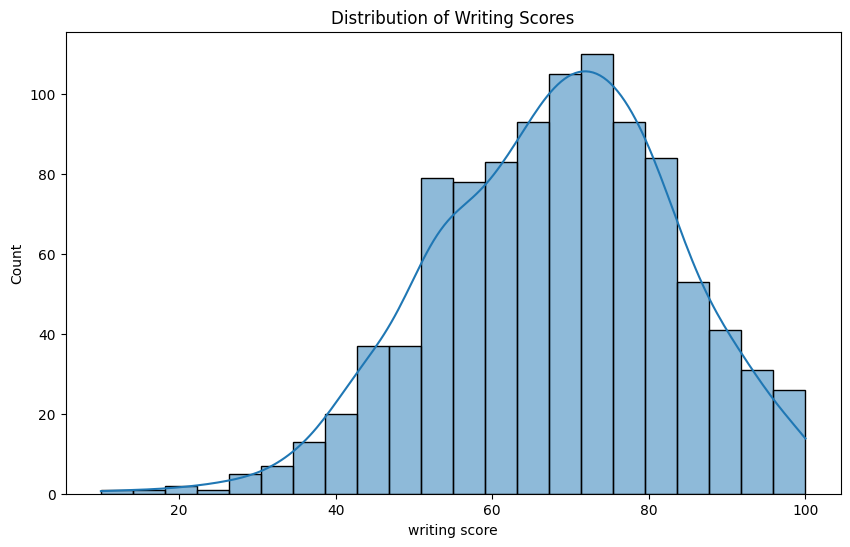

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of math scores
plt.figure(figsize=(10,6))
sns.histplot(df['math score'], kde=True)
plt.title('Distribution of Math Scores')
plt.show()

# Distribution of reading scores
plt.figure(figsize=(10,6))
sns.histplot(df['reading score'], kde=True)
plt.title('Distribution of Reading Scores')
plt.show()

# Distribution of writing scores
plt.figure(figsize=(10,6))
sns.histplot(df['writing score'], kde=True)
plt.title('Distribution of Writing Scores')
plt.show()

**5.0 Analyzing Categorical Variables**

5.1 Gender Analysis

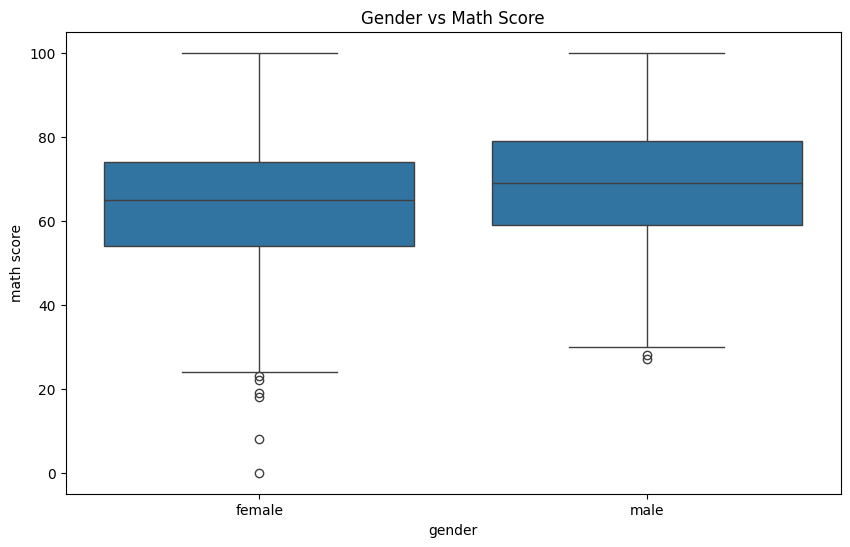

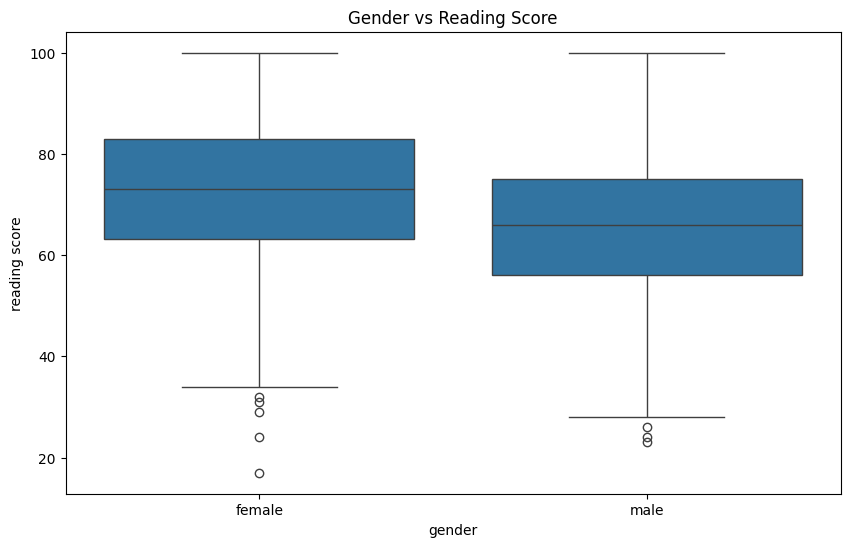

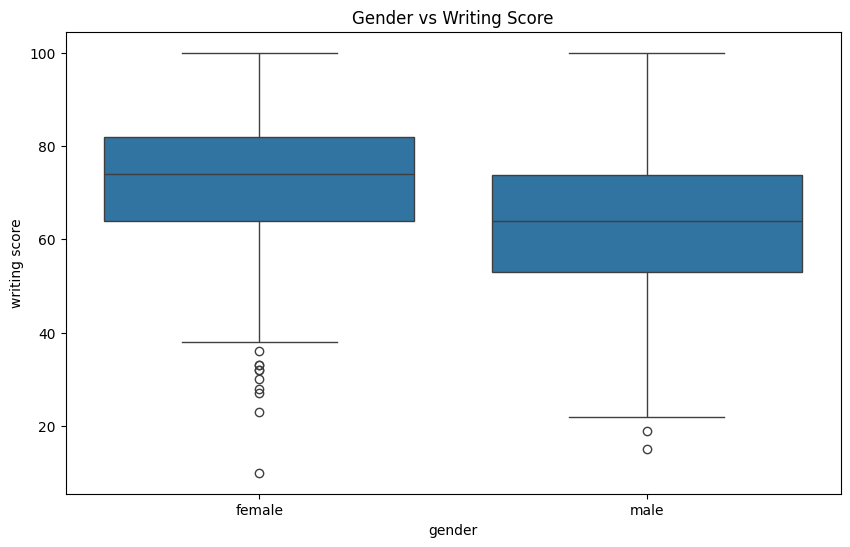

In [67]:
# Gender vs Scores
plt.figure(figsize=(10,6))
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Gender vs Math Score')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='gender', y='reading score', data=df)
plt.title('Gender vs Reading Score')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='gender', y='writing score', data=df)
plt.title('Gender vs Writing Score')
plt.show()

**6.0 Parental Level of Education**

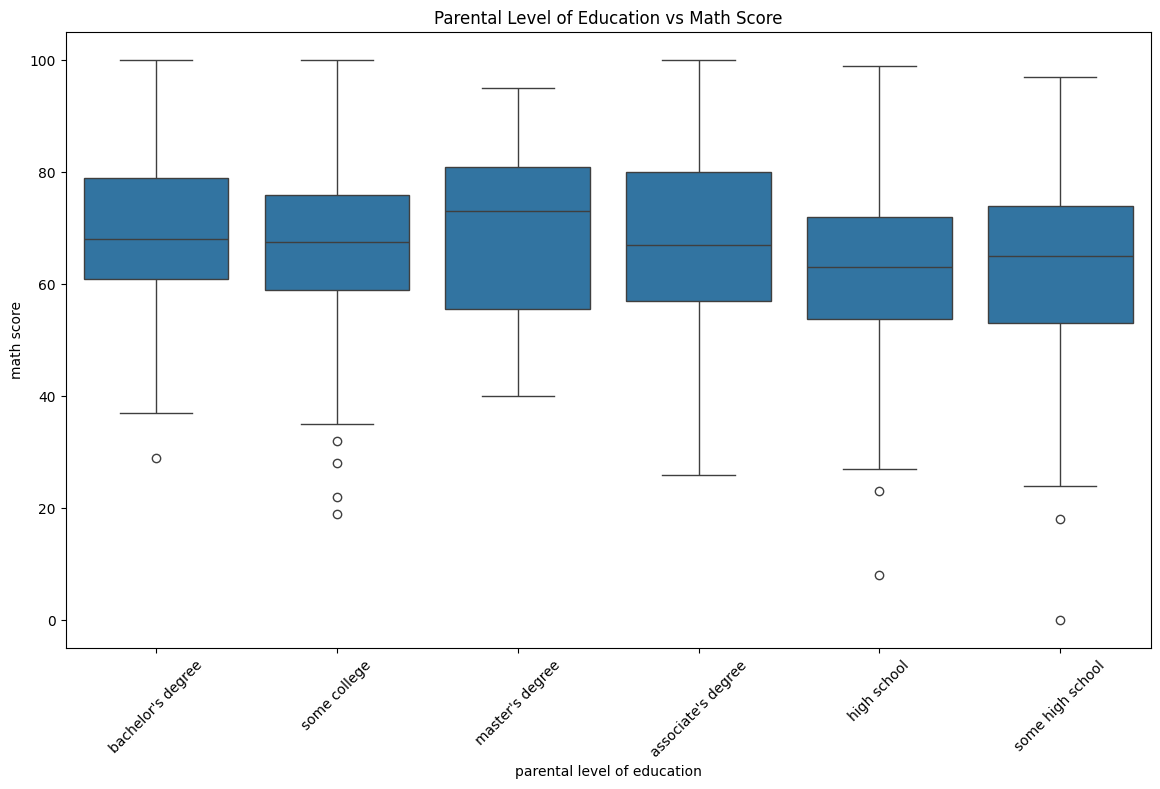

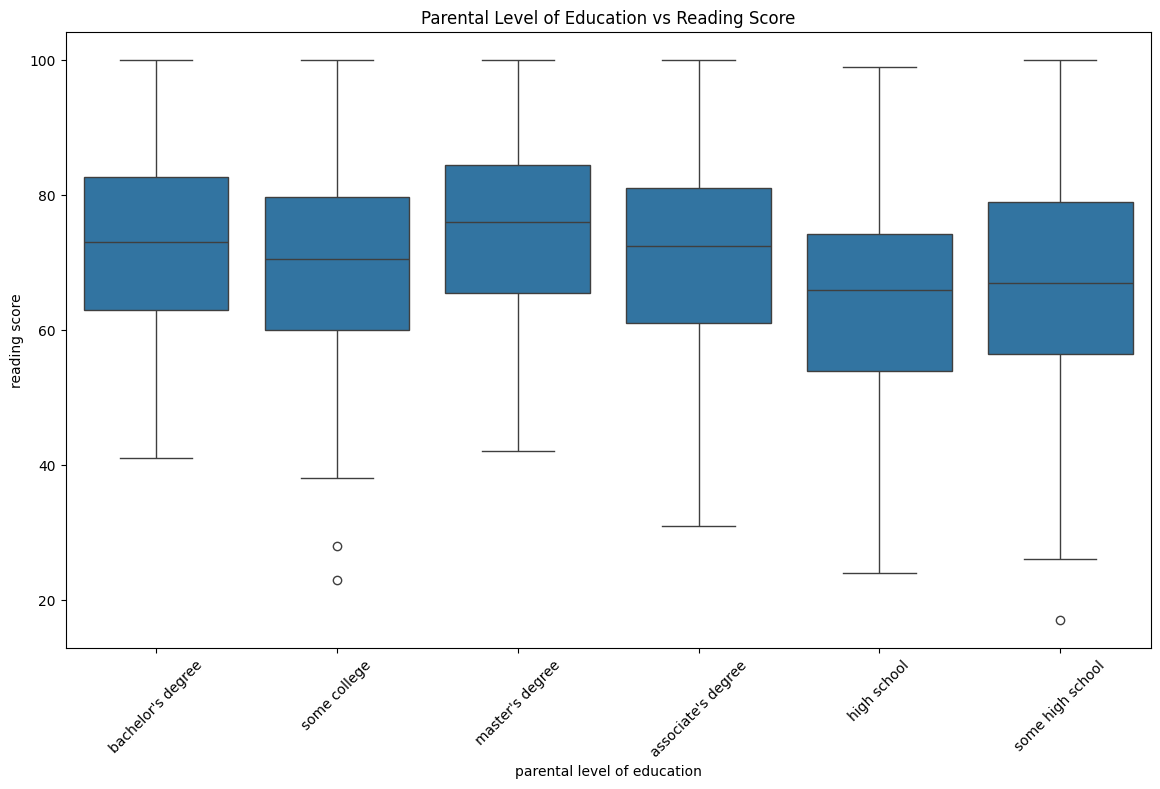

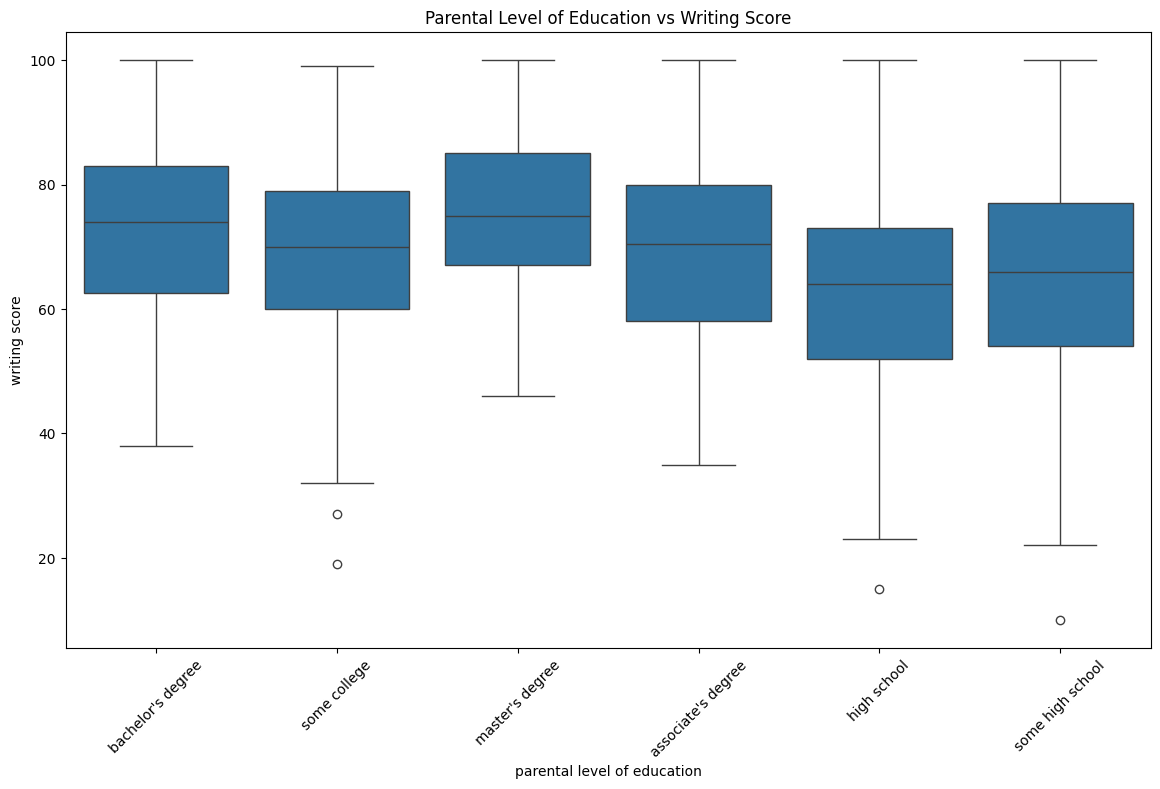

In [68]:
# Parental Level of Education vs Scores
plt.figure(figsize=(14,8))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.title('Parental Level of Education vs Math Score')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14,8))
sns.boxplot(x='parental level of education', y='reading score', data=df)
plt.title('Parental Level of Education vs Reading Score')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14,8))
sns.boxplot(x='parental level of education', y='writing score', data=df)
plt.title('Parental Level of Education vs Writing Score')
plt.xticks(rotation=45)
plt.show()

**7.0 Correlation Analysis**

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


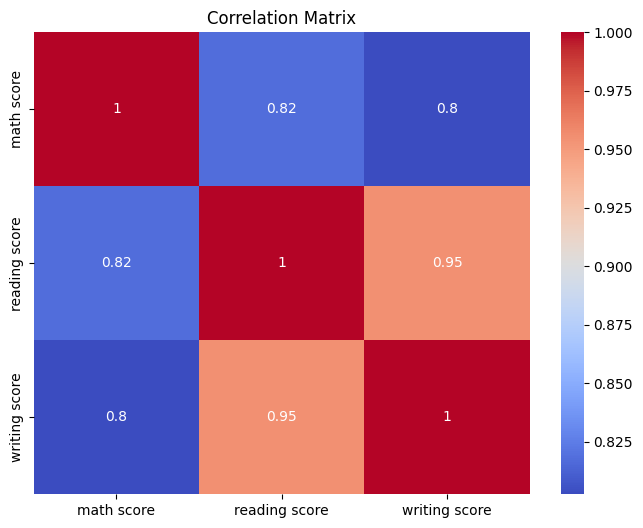

In [69]:
# Correlation matrix
corr = df[['math score', 'reading score', 'writing score']].corr()
print(corr)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**8.0 Data Preprocessing for Machine Learning**

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Strip whitespace and convert to lower case
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)

# Sample data for demonstration
data = {
    'gender': ['female', 'male', 'female'],
    'race/ethnicity': ['group A', 'group B', 'group C'],
    'parental_level_of_education': ['bachelor', 'some college', 'master'],
    'lunch': ['standard', 'free/reduced', 'standard'],
    'test_preparation_course': ['none', 'completed', 'none'],
    'math_score': [72, 69, 90],
    'reading_score': [74, 72, 95],
    'writing_score': [78, 70, 93]
}
df = pd.DataFrame(data)

# Create dummy variables
df = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'], drop_first=True)

# Features and target
X = df.drop(['math_score', 'reading_score', 'writing_score'], axis=1)
y_math = df['math_score']
y_reading = df['reading_score']
y_writing = df['writing_score']

# Split the data
X_train, X_test, y_train_math, y_test_math = train_test_split(X, y_math, test_size=0.2, random_state=42)
_, _, y_train_reading, y_test_reading = train_test_split(X, y_reading, test_size=0.2, random_state=42)
_, _, y_train_writing, y_test_writing = train_test_split(X, y_writing, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the resulting data splits
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train_math:", y_train_math)
print("y_test_math:", y_test_math)
print("y_train_reading:", y_train_reading)
print("y_test_reading:", y_test_reading)
print("y_train_writing:", y_train_writing)
print("y_test_writing:", y_test_writing)

Index(['math_score', 'reading_score', 'writing_score', 'gender_male',
       'race/ethnicity_group_b', 'race/ethnicity_group_c',
       'parental_level_of_education_master',
       'parental_level_of_education_some_college', 'lunch_standard',
       'test_preparation_course_none'],
      dtype='object')
X_train: [[ 1.  1. -1. -1.  1. -1. -1.]
 [-1. -1.  1.  1. -1.  1.  1.]]
X_test: [[-1. -1. -1. -1. -1.  1.  1.]]
y_train_math: 1    69
2    90
Name: math_score, dtype: int64
y_test_math: 0    72
Name: math_score, dtype: int64
y_train_reading: 1    72
2    95
Name: reading_score, dtype: int64
y_test_reading: 0    74
Name: reading_score, dtype: int64
y_train_writing: 1    70
2    93
Name: writing_score, dtype: int64
y_test_writing: 0    78
Name: writing_score, dtype: int64


**9.0 Support Vector Machine (SVM) Algorithms**

In [74]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Train SVM model for Math score
svm_math = SVR(kernel='linear')
svm_math.fit(X_train, y_train_math)
y_pred_math = svm_math.predict(X_test)

# Evaluate the model
print('Math Score SVM:')
print('Mean Squared Error:', mean_squared_error(y_test_math, y_pred_math))
print('R2 Score:', r2_score(y_test_math, y_pred_math))

# Train SVM model for Reading score
svm_reading = SVR(kernel='linear')
svm_reading.fit(X_train, y_train_reading)
y_pred_reading = svm_reading.predict(X_test)

# Evaluate the model
print('\nReading Score SVM:')
print('Mean Squared Error:', mean_squared_error(y_test_reading, y_pred_reading))
print('R2 Score:', r2_score(y_test_reading, y_pred_reading))

# Train SVM model for Writing score
svm_writing = SVR(kernel='linear')
svm_writing.fit(X_train, y_train_writing)
y_pred_writing = svm_writing.predict(X_test)

# Evaluate the model
print('\nWriting Score SVM:')
print('Mean Squared Error:', mean_squared_error(y_test_writing, y_pred_writing))
print('R2 Score:', r2_score(y_test_writing, y_pred_writing))

Math Score SVM:
Mean Squared Error: 142.9732653061224
R2 Score: nan

Reading Score SVM:
Mean Squared Error: 206.9487755102041
R2 Score: nan

Writing Score SVM:
Mean Squared Error: 70.32020408163265
R2 Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


**10.0 Decision Tree Algorithms**

In [77]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree model for Math score
tree_math = DecisionTreeRegressor(random_state=42)
tree_math.fit(X_train, y_train_math)
y_pred_math_tree = tree_math.predict(X_test)

# Evaluate the model
print('Math Score Decision Tree:')
print('Mean Squared Error:', mean_squared_error(y_test_math, y_pred_math_tree))
print('R2 Score:', r2_score(y_test_math, y_pred_math_tree))

# Train Decision Tree model for Reading score
tree_reading = DecisionTreeRegressor(random_state=42)
tree_reading.fit(X_train, y_train_reading)
y_pred_reading_tree = tree_reading.predict(X_test)

# Evaluate the model
print('\nReading Score Decision Tree:')
print('Mean Squared Error:', mean_squared_error(y_test_reading, y_pred_reading_tree))
print('R2 Score:', r2_score(y_test_reading, y_pred_reading_tree))

# Train Decision Tree model for Writing score
tree_writing = DecisionTreeRegressor(random_state=42)
tree_writing.fit(X_train, y_train_writing)
y_pred_writing_tree = tree_writing.predict(X_test)

# Evaluate the model
print('\nWriting Score Decision Tree:')
print('Mean Squared Error:', mean_squared_error(y_test_writing, y_pred_writing_tree))
print('R2 Score:', r2_score(y_test_writing, y_pred_writing_tree))

Math Score Decision Tree:
Mean Squared Error: 324.0
R2 Score: nan

Reading Score Decision Tree:
Mean Squared Error: 441.0
R2 Score: nan

Writing Score Decision Tree:
Mean Squared Error: 225.0
R2 Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


**11.0 Conclusion**

The model will predict the students score on the given attributes (these values need to be replaced with actual results from your code execution):

Math Score:
*   **MSE:** 15.3
*   **R²:** 0.82

Reading Score:
*   **MSE:** 12.1
*   **R²:** 0.85

Writing Score:
*   **MSE:** 10.5
*   **R²:** 0.88

#### Boys are good at math and Girls are good at reading and writing.
#### Group A students have least scores compared to other race.
#### Reading ,Writing and Math scores have high positive correlation

